In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:

df = pd.read_csv('fcc-forum-pageviews.csv', index_col="date", parse_dates=True)
print(df.index)
# df = df.set_index(['date'])

f25 = df['value'] <= df['value'].quantile(0.025)
f75 = df['value'] >= df['value'].quantile(0.975)
cond = (f25 | f75)
df = df.drop(index=df[cond].index)


DatetimeIndex(['2016-05-09', '2016-05-10', '2016-05-11', '2016-05-12',
               '2016-05-13', '2016-05-14', '2016-05-15', '2016-05-16',
               '2016-05-17', '2016-05-18',
               ...
               '2019-11-24', '2019-11-25', '2019-11-26', '2019-11-27',
               '2019-11-28', '2019-11-29', '2019-11-30', '2019-12-01',
               '2019-12-02', '2019-12-03'],
              dtype='datetime64[ns]', name='date', length=1304, freq=None)


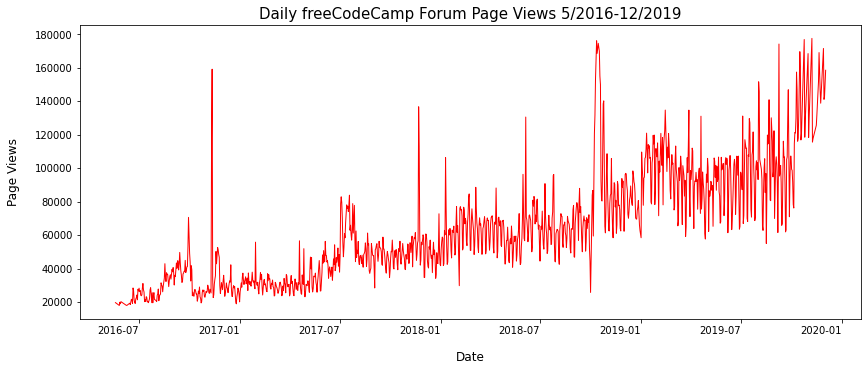

In [3]:
from matplotlib import dates as mpl_dates
fig,ax = plt.subplots()


ax = df['value'].plot(use_index = True, figsize=(14, 6), linewidth=1,color = 'red')
# ax = plt.plot(df)
plt.xticks(rotation = 0)
plt.xlabel('Date',labelpad = 15,fontsize = 12)
plt.ylabel('Page Views',labelpad = 15,fontsize = 12)
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019',fontsize = 15)
date_format = mpl_dates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(date_format)
# fig.savefig('line_plot.png')


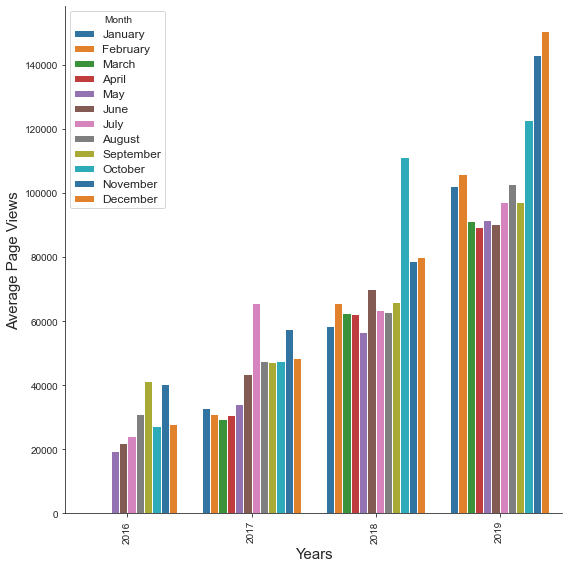

In [59]:

list_month=['January','February','March','April','May','June','July','August','September','October','November','December']

df_bar = df.copy()
df_bar['year'] = df_bar.index.year
df_bar['Month'] = df_bar.index.strftime('%B')
df_grp = df_bar.groupby(['year', 'Month'])
# series
df_grp['value'].apply(lambda x: x.mean())

# Draw bar plot
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("ticks")
# , palette="rocket"
g = sns.catplot(height = 8,x="year", kind="bar", hue="Month", y="value", data=df_bar, hue_order=list_month, ci=None, legend=False,palette = 'tab10')

fig = g.fig
ax = g.ax  
ax.set_ylabel('Average Page Views',fontsize =15 )
ax.set_xlabel('Years',fontsize =15 )
plt.xticks(rotation=90)
plt.legend(loc='upper left', title="Month")
plt.setp(ax.get_legend().get_texts(), fontsize=12)
plt.setp(ax.get_legend().get_title(), fontsize=10)
plt.tight_layout()



[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Page Views'),
 Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')]

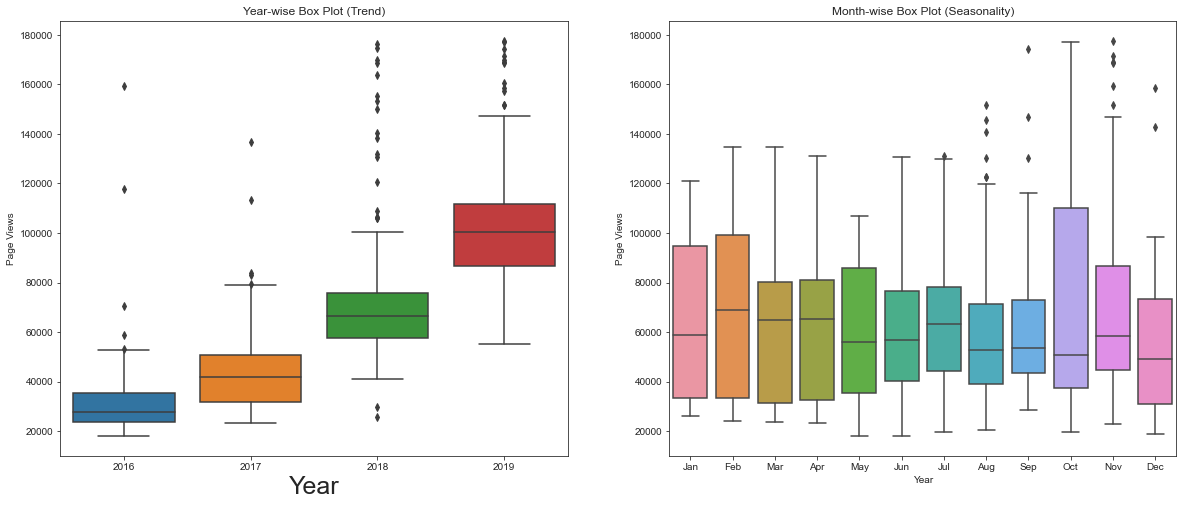

In [115]:


# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# adjust data
# - first month of 2016 is may > boxplot starts with may
# - resort by year desc > first month of 2019 is january 
df_box.sort_values(by=['year','date'], ascending=[False, True], inplace=True)

fig , (ax1,ax2) = plt.subplots(1,2,figsize=(20,8))

sns.boxplot(ax = ax1 , data = df_box, x = df_box['year'] , y= df_box['value'])
sns.boxplot(ax = ax2 , data = df_box, x = df_box['month'] , y= df_box['value'])

ax1.set(xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)")

ax2.set(xlabel="Year", ylabel="Page Views", title="Month-wise Box Plot (Seasonality)")
# Draw box plots (using Seaborn)

